In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
Employee = pd.read_csv("C:\\Users\\jessd\\OneDrive\\Desktop\\Semester 3\\Machine Learning - 1\\Project\\HR_comma_sep.csv")

In [4]:
print(Employee)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [5]:
# Check to see if there are any missing values in our data set
Employee.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [6]:
# Renaming certain columns for better readability
EmployeeRet = Employee.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [7]:
print(EmployeeRet)

       satisfaction  evaluation  projectCount  averageMonthlyHours  \
0              0.38        0.53             2                  157   
1              0.80        0.86             5                  262   
2              0.11        0.88             7                  272   
3              0.72        0.87             5                  223   
4              0.37        0.52             2                  159   
...             ...         ...           ...                  ...   
14994          0.40        0.57             2                  151   
14995          0.37        0.48             2                  160   
14996          0.37        0.53             2                  143   
14997          0.11        0.96             6                  280   
14998          0.37        0.52             2                  158   

       yearsAtCompany  workAccident  turnover  promotion Department  salary  
0                   3             0         1          0      sales     low  
1  

In [8]:
front = EmployeeRet['turnover']
EmployeeRet.drop(labels=['turnover'], axis=1,inplace = True)
EmployeeRet.insert(0, 'turnover', front)
EmployeeRet.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [9]:
#3.	Conversion of categorical data into numerical data
label_encoder = LabelEncoder()

EmployeeRet['Department'] = label_encoder.fit_transform(EmployeeRet['Department'])
EmployeeRet['salary'] = label_encoder.fit_transform(EmployeeRet['salary'])

print(EmployeeRet)

       turnover  satisfaction  evaluation  projectCount  averageMonthlyHours  \
0             1          0.38        0.53             2                  157   
1             1          0.80        0.86             5                  262   
2             1          0.11        0.88             7                  272   
3             1          0.72        0.87             5                  223   
4             1          0.37        0.52             2                  159   
...         ...           ...         ...           ...                  ...   
14994         1          0.40        0.57             2                  151   
14995         1          0.37        0.48             2                  160   
14996         1          0.37        0.53             2                  143   
14997         1          0.11        0.96             6                  280   
14998         1          0.37        0.52             2                  158   

       yearsAtCompany  workAccident  pr

In [10]:
#Exploring the Data

#3a. Statistical Overview
EmployeeRet.shape

# The dataset contains 10 columns and 14999 observations

(14999, 10)

In [11]:
# Check the type of our features. 
EmployeeRet.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
Department               int32
salary                   int32
dtype: object

In [12]:
turnover_rate = EmployeeRet.turnover.value_counts() / len(EmployeeRet)
print(turnover_rate)
#As per the below calculations, 76% of employees continued to the work with the company and 24% 
#of the employees left the firm.
# NOTE: When performing cross validation, its important to maintain this turnover ratio

0    0.761917
1    0.238083
Name: turnover, dtype: float64


In [13]:
# Display the statistical overview of the employees
EmployeeRet.describe()


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,5.870525,1.347290
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.868786,0.625819
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,4.000000,1.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,7.000000,1.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000


In [15]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = EmployeeRet.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
turnover,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


                     turnover  satisfaction  evaluation  projectCount  \
turnover             1.000000     -0.388375    0.006567      0.023787   
satisfaction        -0.388375      1.000000    0.105021     -0.142970   
evaluation           0.006567      0.105021    1.000000      0.349333   
projectCount         0.023787     -0.142970    0.349333      1.000000   
averageMonthlyHours  0.071287     -0.020048    0.339742      0.417211   
yearsAtCompany       0.144822     -0.100866    0.131591      0.196786   
workAccident        -0.154622      0.058697   -0.007104     -0.004741   
promotion           -0.061788      0.025605   -0.008684     -0.006064   
Department           0.032105      0.003153    0.007772      0.009268   
salary              -0.001294      0.011754    0.013965      0.009672   

                     averageMonthlyHours  yearsAtCompany  workAccident  \
turnover                        0.071287        0.144822     -0.154622   
satisfaction                   -0.020048       -

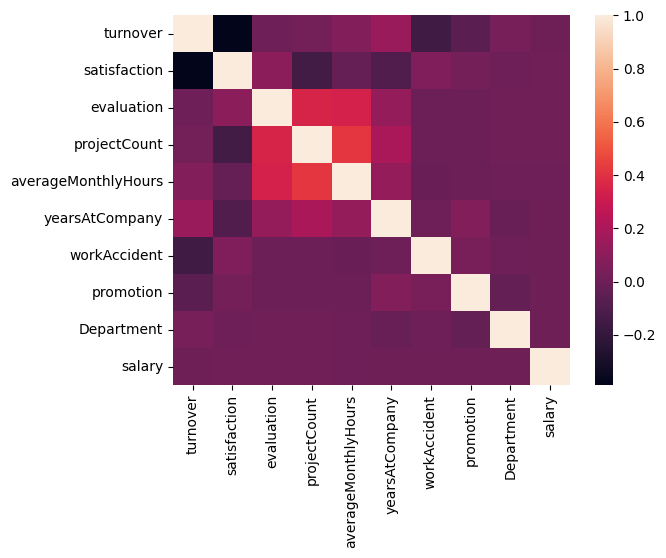

In [16]:
# 3b. Correlation Matrix & Heatmap
#Correlation Matrix
corr = EmployeeRet.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

print(corr)

In [17]:
# # 3b2. Statistical Test for Correlation
# ## One-Sample T-Test (Measuring Satisfaction Level)

# Compare the means of our employee turnover satisfaction against the employee population satisfaction

emp_population = EmployeeRet['satisfaction'][EmployeeRet['turnover'] == 0].mean()
emp_turnover_satisfaction = EmployeeRet[EmployeeRet['turnover']==1]['satisfaction'].mean()

print('The mean satisfaction for the employee population with no turnover is: ' + str(emp_population))
print('The mean satisfaction for employees that had a turnover is: ' + str(emp_turnover_satisfaction))

The mean satisfaction for the employee population with no turnover is: 0.666809590479524
The mean satisfaction for employees that had a turnover is: 0.4400980117614114


In [18]:
# ## Conducting the T-Test
import scipy.stats as stats
stats.ttest_1samp(a=  EmployeeRet[EmployeeRet['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who 
                                                                               #had a Turnover
                  popmean = emp_population)  # Employee Who Had No Turnover satisfaction mean


## T-Test Result ##

# The test result shows the **test statistic "t" is equal to -51.33**. 
#This test statistic tells us how much the sample mean deviates from the null hypothesis. 
#If the t-statistic lies **outside** the quantiles of the t-distribution corresponding to our confidence level and 
#degrees of freedom, we reject the null hypothesis. We can check the quantiles with **stats.t.ppf()**:


TtestResult(statistic=-51.33034867547431, pvalue=0.0, df=3570)

In [19]:
# ## T-Test Quantile
# If the t-statistic value we calculated above (-51.33) is outside the quantiles, then we can reject the null hypothesis

degree_freedom = len(EmployeeRet[EmployeeRet['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


In [ ]:
# ## One-Sample T-Test Summary
# T-Test = -51.33 | P-Value = 0.000_ | Reject Null Hypothesis

In [20]:
# ## Checking for Outliers

# Calculate the first and third quartiles (Q1 and Q3)
Q1 = EmployeeRet.quantile(0.25)
Q3 = EmployeeRet.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((EmployeeRet < lower_bound) | (EmployeeRet > upper_bound)).any(axis=1)

# Print the rows containing outliers
print("Rows with outliers:")
print(EmployeeRet[outliers])

Rows with outliers:
       turnover  satisfaction  evaluation  projectCount  averageMonthlyHours  \
0             1          0.38        0.53             2                  157   
1             1          0.80        0.86             5                  262   
2             1          0.11        0.88             7                  272   
3             1          0.72        0.87             5                  223   
4             1          0.37        0.52             2                  159   
...         ...           ...         ...           ...                  ...   
14994         1          0.40        0.57             2                  151   
14995         1          0.37        0.48             2                  160   
14996         1          0.37        0.53             2                  143   
14997         1          0.11        0.96             6                  280   
14998         1          0.37        0.52             2                  158   

       yearsAtCompa

C:\Users\jessd\AppData\Local\Temp\ipykernel_15000\3125336543.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(EmployeeRet.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
C:\Users\jessd\AppData\Local\Temp\ipykernel_15000\3125336543.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

Text(0, 0.5, 'Employee Count')

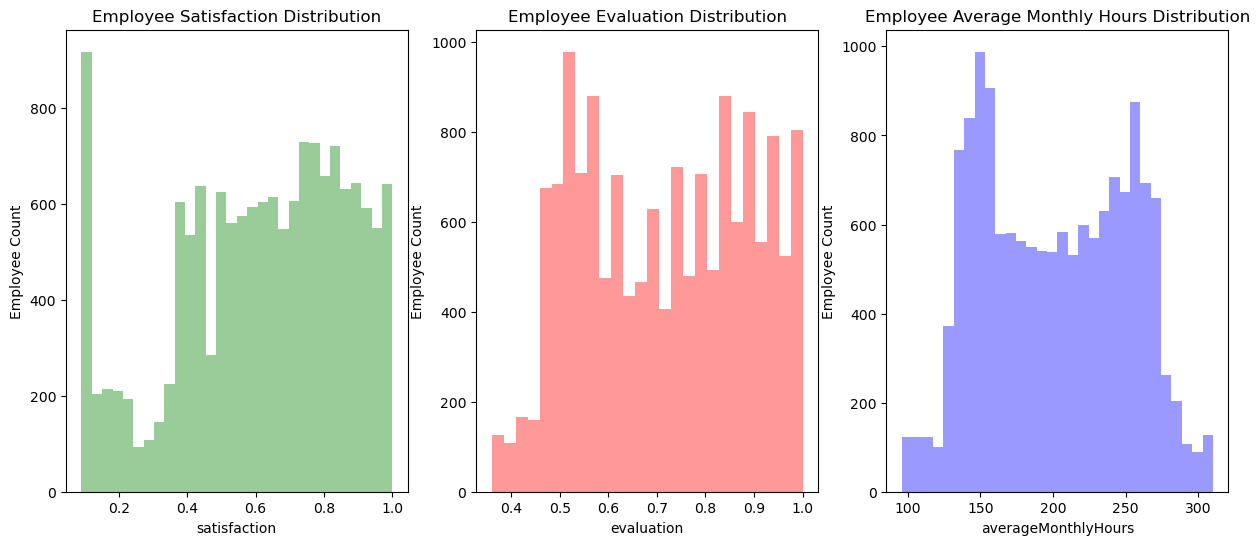

In [30]:
# ## 3c. Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(EmployeeRet.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(EmployeeRet.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(EmployeeRet.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')



In [ ]:
# Summary: Let's examine the distribution on some of the employee's features. Here's what we found:
# Satisfaction - There is a huge spike for employees with low satisfaction and high satisfaction.
# Evaluation - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) 
# and high evaluations (more than 0.8)

# AverageMonthlyHours - There is another bimodal distribution of employees with lower and higher 
# average monthly hours (less than 150 hours & more than 250 hours)

# The evaluation and average monthly hour graphs both share a similar distribution.
# Employees with lower average monthly hours were evaluated less and vice versa.
# If you look back at the correlation matrix, the high correlation between evaluation 
# and averageMonthlyHours does support this finding.

# The below questions arise from the above analysis
# Is there a reason for the high spike in low satisfaction of employees?
# Could employees be grouped in a way with these features?
# Is there a correlation between evaluation and averageMonthlyHours?

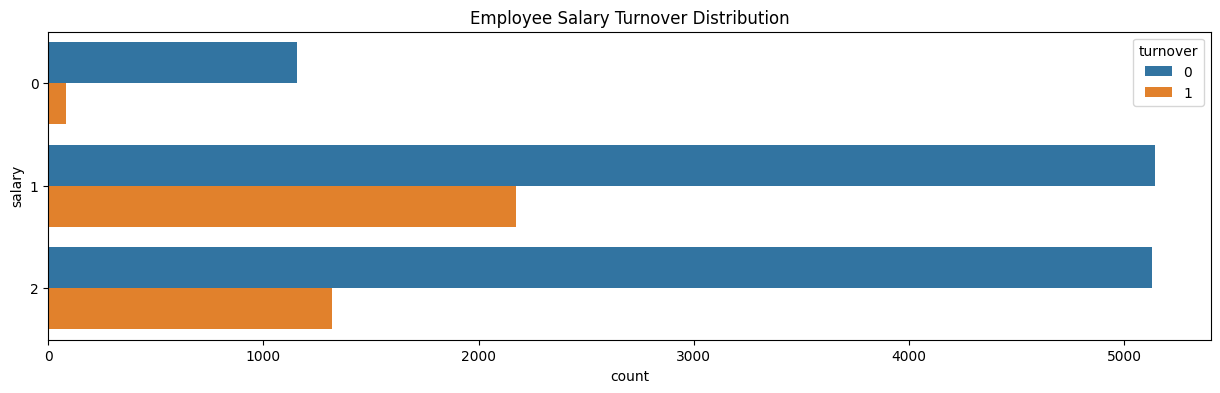

In [21]:
## 3d. Salary V.S. Turnover

f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=EmployeeRet).set_title('Employee Salary Turnover Distribution');

# Summary: This is not unusual. Here's what we found:
# Majority of employees who left either had low or medium salary.
# Barely any employees left with high salary
# Employees with low to average salaries tend to leave the company.


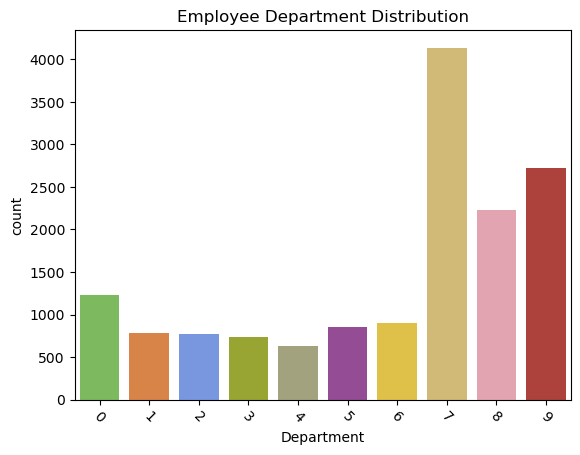

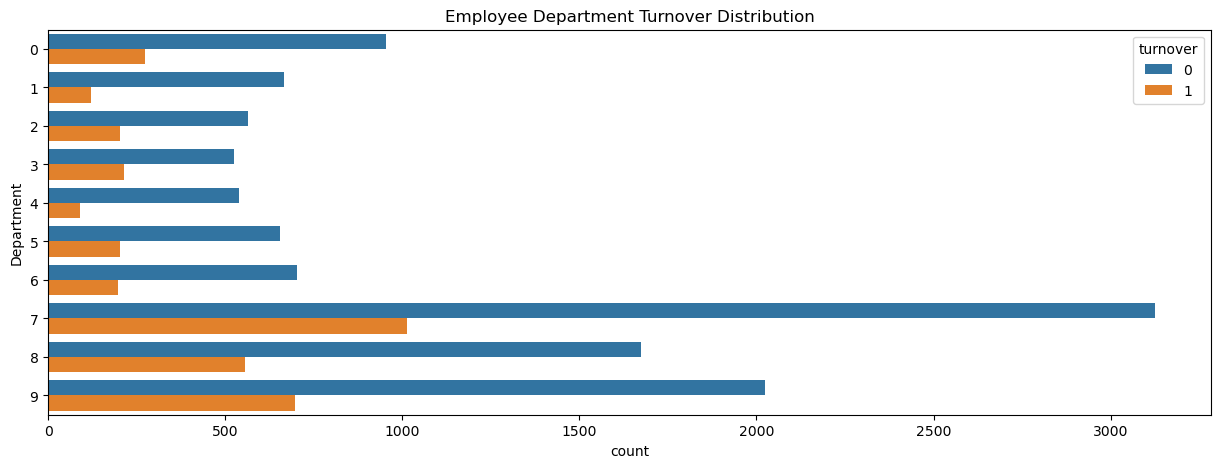

In [33]:
# ## 3e. Department V.S. Turnover

# Employee distribution
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Department', data=EmployeeRet, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)


f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Department", hue='turnover', data=EmployeeRet).set_title('Employee Department Turnover Distribution');

# Summary: Let's see more information about the departments. Here's what we found:

# The sales, technical, and support department were the top 3 departments to have employee turnover
# The management department had the smallest amount of turnover


[Text(0, 0.5, 'Percent')]

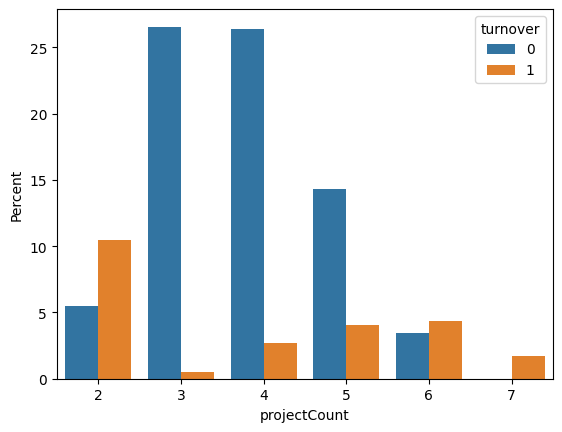

In [22]:
# ## 3f. Turnover V.S. ProjectCount

ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=EmployeeRet, estimator=lambda x: len(x) / len(EmployeeRet) * 100)
ax.set(ylabel="Percent")

# Summary: 
# More than half of the employees with 2,6, and 7 projects left the company
# Majority of the employees who did not leave the company had 3,4, and 5 projects
# All of the employees with 7 projects left the company
# There is an increase in employee turnover rate as project count increases

C:\Users\jessd\AppData\Local\Temp\ipykernel_15000\652518146.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(EmployeeRet.loc[(EmployeeRet['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
C:\Users\jessd\AppData\Local\Temp\ipykernel_15000\652518146.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(EmployeeRet.loc[(EmployeeRet['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')


Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

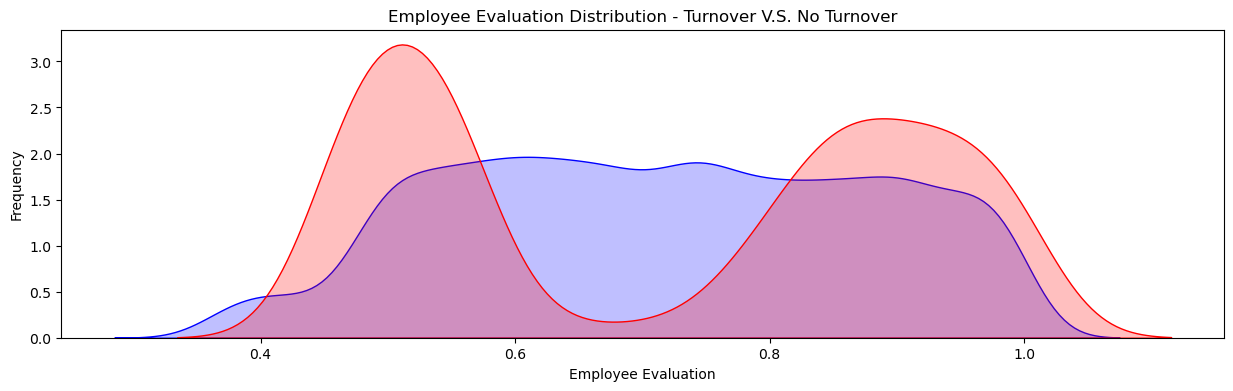

In [37]:
## 3g. Turnover V.S. Evaluation

# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(EmployeeRet.loc[(EmployeeRet['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(EmployeeRet.loc[(EmployeeRet['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

# Summary:
# There is a biomodal distribution for those employees that left the company.
# Employees with low performance tend to leave the company more.
# Employees with high performance tend to leave the company more
# Employees with evaluation levels (0.6-0.8) had the smallest turnover rate


C:\Users\jessd\AppData\Local\Temp\ipykernel_15372\3225167339.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(EmployeeRet.loc[(EmployeeRet['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
C:\Users\jessd\AppData\Local\Temp\ipykernel_15372\3225167339.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(EmployeeRet.loc[(EmployeeRet['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')


Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

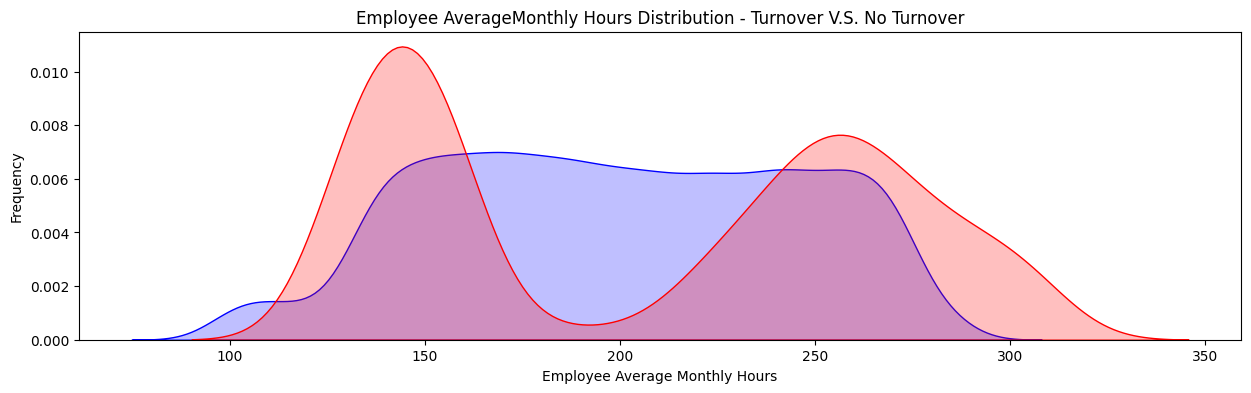

In [23]:
## 3h. Turnover V.S. AverageMonthlyHours

#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(EmployeeRet.loc[(EmployeeRet['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(EmployeeRet.loc[(EmployeeRet['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

# Summary:
# Another bi-modal distribution for employee turnover
# Employees who had less hours of work (~150hours or less) left the company more
# Employees who had too many hours of work (~250 or more) left the company
# Employees who left generally were underworked or overworked.


C:\Users\jessd\AppData\Local\Temp\ipykernel_15372\4056692152.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(EmployeeRet.loc[(EmployeeRet['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
C:\Users\jessd\AppData\Local\Temp\ipykernel_15372\4056692152.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(EmployeeRet.loc[(EmployeeRet['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')


Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

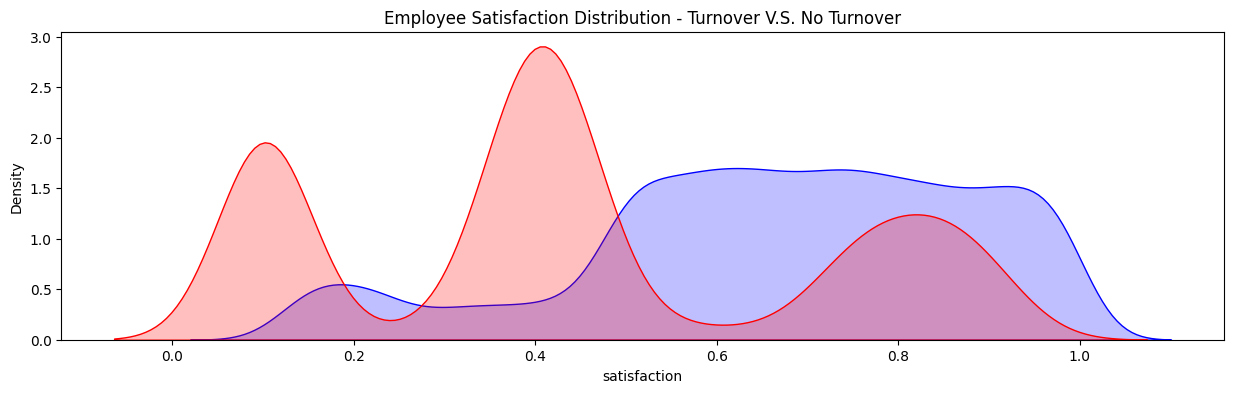

In [24]:
# ## 3i. Turnover V.S. Satisfaction

#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(EmployeeRet.loc[(EmployeeRet['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(EmployeeRet.loc[(EmployeeRet['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

# Summary:
# There is a tri-modal distribution for employees that turnovered
# Employees who had really low satisfaction levels (0.2 or less) left the company more
# Employees who had low satisfaction levels (0.3~0.5) left the company more
# Employees who had really high satisfaction levels (0.7 or more) left the company more

<Axes: xlabel='projectCount', ylabel='averageMonthlyHours'>

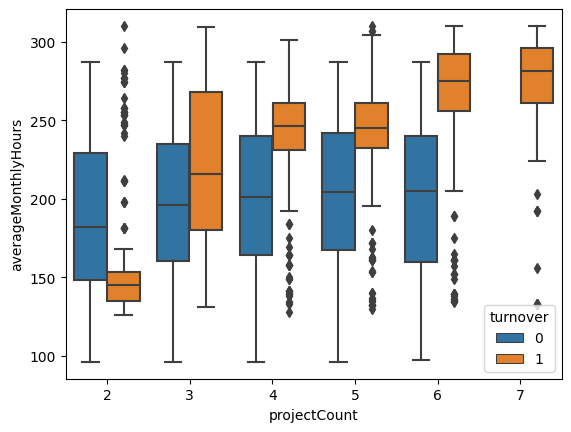

In [25]:
# ## 3j. ProjectCount VS AverageMonthlyHours

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=EmployeeRet)

# Summary:
# As project count increased, so did average monthly hours
# Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a 
# turnver and did not.
# Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects
# In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects

# ProjectCount VS AverageMonthlyHours [BOXPLOT]
# Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 
# 250hours/month and 150hours/month



<Axes: xlabel='projectCount', ylabel='evaluation'>

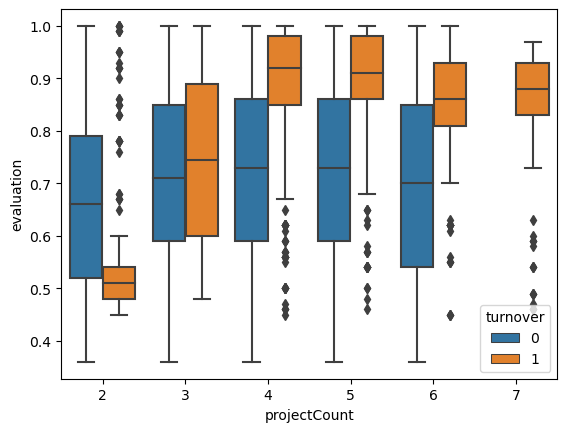

In [46]:
#ProjectCount VS Evaluation

import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=EmployeeRet)


#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super 
#high evaluations left

# Summary: 
# This graph looks very similar to the graph above. What we find strange with this graph is with the turnover group. 
#There is an increase in evaluation for employees who did more projects within the turnover group. 
#But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in 
#project counts.
#
# Questions to think about:
# 
# *Why is it that employees who left, had on average, a higher evaluation than employees who did not leave, 
#even with an increase in project count? *
# Shouldn't employees with lower evaluations tend to leave the company more?

C:\Users\jessd\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


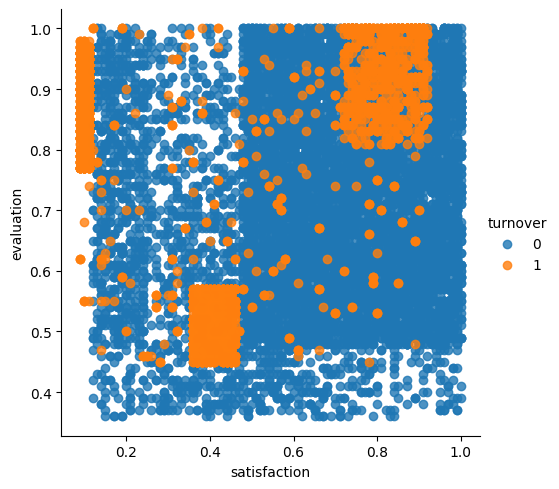

In [26]:
# ## 3l. Satisfaction VS Evaluation


sns.lmplot(x='satisfaction', y='evaluation', data=EmployeeRet,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage


# Summary: This is by far the most compelling graph. This is what we found:
# 
# There are 3 distinct clusters for employees who left the company
# Cluster 1 (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. 
# Which could be a good indication that employees who left the company were good workers but felt horrible at their job.
# Question: What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? 
# Could this cluster mean employees who are "overworked"?

# Cluster 2 (Bad and Sad Employee): Satisfaction between about 0.35~0.45 and evaluations below ~0.58. 
# This could be seen as employees who were badly evaluated and felt bad at work.
# Question: Could this cluster mean employees who "under-performed"?

# Cluster 3 (Hard-working and Happy Employee): Satisfaction between 0.7~1.0 and evaluations were greater than 0.8.
# Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for 
#their performance.
# Question: Could this cluser mean that employees left because they found another job opportunity? 


C:\Users\jessd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


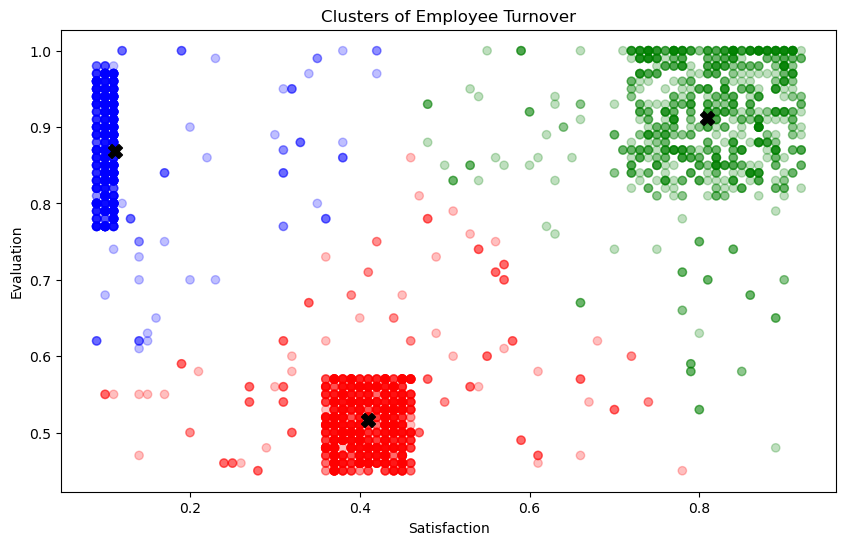

In [48]:
# ## 3n. K-Means Clustering of Employee Turnover


# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(EmployeeRet[EmployeeRet.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=EmployeeRet[EmployeeRet.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()


# Cluster 1 (Blue): Hard-working and Sad Employees
# Cluster 2 (Red): Bad and Sad Employee
# Cluster 3 (Green): Hard-working and Happy Employee


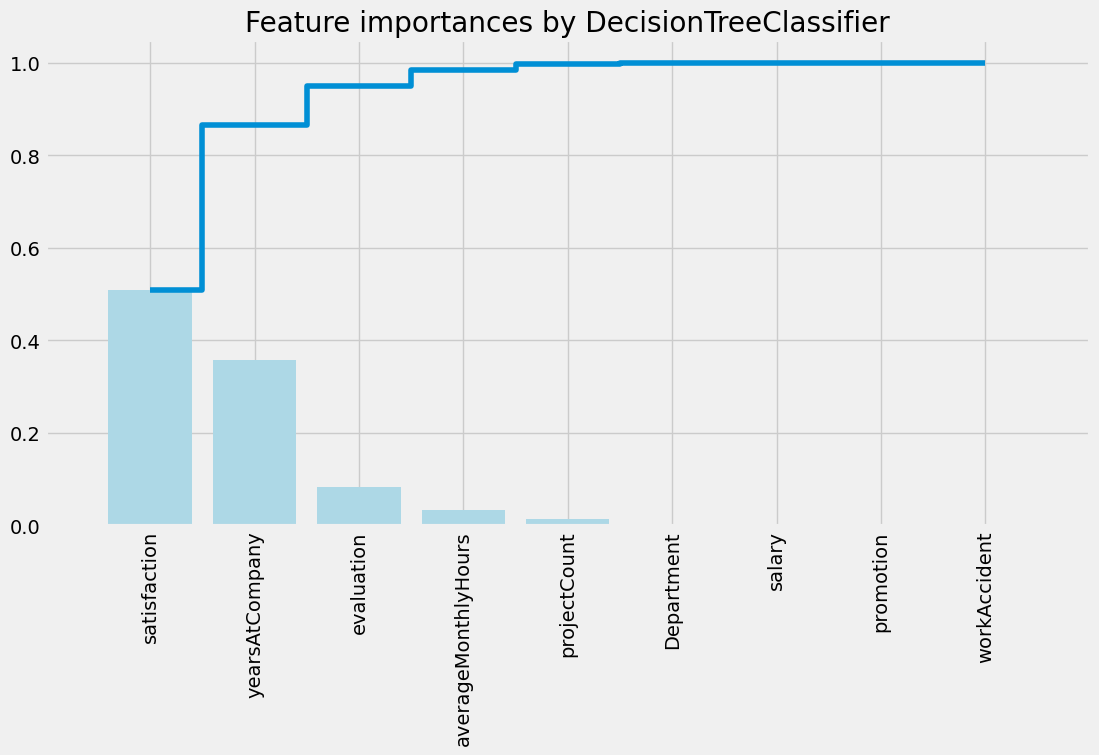

In [27]:
# ## Feature Importance


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Create train and test splits
target_name = 'turnover'
X = EmployeeRet.drop('turnover', axis=1)


y=EmployeeRet[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = EmployeeRet.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()


# Summary:
# By using a decision tree classifier, it could rank the features used for the prediction. 
# The top three features were employee satisfaction, yearsAtCompany, and evaluation. 
# This is helpful in creating our model for logistic regression because it’ll be more interpretable to understand what 
# goes into our model when we utilize less features.

# Top 3 Features:

# Satisfaction
# YearsAtCompany
# Evaluation 

In [52]:
# # Validation Split


from sklearn.preprocessing import StandardScaler


X = EmployeeRet.drop('turnover', axis=1)
y = EmployeeRet['turnover']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Print the shapes of the training and validation datasets
print("Training data shape (X_train):", X_train.shape)
print("Validation data shape (X_test):", X_test.shape)
print("Training data shape (y_train):", y_train.shape)
print("Validation data shape (y_test):", y_test.shape)


Training data shape (X_train): (11999, 9)
Validation data shape (X_test): (3000, 9)
Training data shape (y_train): (11999,)
Validation data shape (y_test): (3000,)


In [31]:
## 4. Machine Learning Model Development & Model Evalua􀆟on:

#Logistic Regression Analysis
# Convert these variables into categorical variables
EmployeeRet["Department"] = EmployeeRet["Department"].astype('category').cat.codes
EmployeeRet["salary"] = EmployeeRet["salary"].astype('category').cat.codes

# Move the reponse variable "turnover" to the front of the table
front = EmployeeRet['turnover']
EmployeeRet.drop(labels=['turnover'], axis=1,inplace = True)
EmployeeRet.insert(0, 'turnover', front)

# Create an intercept term for the logistic regression equation
EmployeeRet['int'] = 1
indep_var = ['satisfaction', 'evaluation', 'yearsAtCompany', 'int', 'turnover']
EmployeeRet = EmployeeRet[indep_var]

# Create train and test splits
target_name = 'turnover'
X = EmployeeRet.drop('turnover', axis=1)

y=EmployeeRet[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()

,satisfaction,evaluation,yearsAtCompany,int
9003,0.59,1.00,3,1
5697,0.81,0.98,2,1
10691,1.00,0.93,2,1
1884,0.87,0.91,5,1
13572,0.87,0.48,3,1


In [32]:
import statsmodels.api as sm
iv = ['satisfaction','evaluation','yearsAtCompany', 'int']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.467233
         Iterations 6


satisfaction     -3.769022
evaluation        0.207596
yearsAtCompany    0.170145
int               0.181896
dtype: float64

In [ ]:
Using Logistic Regression Coefficients

With the elimination of the other variables, we used the three most important features to create our model: 
Satisfaction, Evaluation, and YearsAtCompany.

The following overall equation was developed:

Employee Turnover Score = Satisfaction(-3.769022) + Evaluation(0.207596) + YearsAtCompany(*0.170145) + **0.181896


Explanation of Coefficients
Employee Turnover Score = Satisfaction(-3.769022) + Evaluation(0.207596) + YearsAtCompany(*0.170145) + **0.181896

The values above are the coefficient assigned to each independent variable. 
The constant 0.181896 represents the effect of all uncontrollable variables.

In [33]:
# Create function to compute the coefficients
coef = answer.params
def y (coef, Satisfaction, Evaluation, YearsAtCompany) : 
    return coef[3] + coef[0]*Satisfaction + coef[1]*Evaluation + coef[2]*YearsAtCompany

import numpy as np

# An Employee with 0.7 Satisfaction and 0.8 Evaluation and worked 3 years has a 14% chance of turnover
y1 = y(coef, 0.7, 0.8, 3)
p = np.exp(y1) / (1+np.exp(y1))
p

0.1443146255973825

In [ ]:
Intepretation of the Logistic Regression Model score

We selected a random employee having a satisfaction score of 0.7, performance evaluation of 0.8 and has worked for 
3 years at the firm and substituted the below values in the above equation.

Satisfaction: 0.7 Evaluation: 0.8 YearsAtCompany: 3

Employee Turnover Score = (0.7)(-3.769022) + (0.8)(0.207596) + (3)(0.170145) + 0.181896 = 0.14431 = 14%**

Result: This employee would have a 14% chance of leaving the company. 
This information can then be used to identify employees who are likely to leave depending on their satisfaction score, 
performance evaluation and number of years spent with the firm and accordingly formulate a retention plan. 

In [ ]:
#Evaluating the accuracy of Logistic Regression Model 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [38]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

# Create train and test splits
target_name = 'turnover'
X = EmployeeRet.drop('turnover', axis=1)
#robust_scaler = RobustScaler()
#X = robust_scaler.fit_transform(X)
y=EmployeeRet[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)


# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

    # Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Base rate accuracy is 0.76
Logistic accuracy is 0.77


In [39]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.793 (0.014)


In [ ]:
COMPARISION WITH OTHER MODELS

Beyond the logistic regression model, we tried to explore the performance of Random Forest & Decision Tree Model to 
determine the best model to predict employee turnover.


In [59]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model V.S. Decision Tree Model
print ("---Base Rate Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))


logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Regression Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))
# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value


# Make predictions on the testing data
y_pred = logis.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)



# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Make predictions on the testing data
y_pred = dtree.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


---Base Rate Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1714
           1       0.00      0.00      0.00       536

    accuracy                           0.76      2250
   macro avg       0.38      0.50      0.43      2250
weighted avg       0.58      0.76      0.66      2250



 ---Logistic Regression Model---
Logistic AUC = 0.74
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1714
           1       0.48      0.73      0.58       536

    accuracy                           0.75      2250
   macro avg       0.69      0.74      0.70      2250
weighted avg       0.80      0.75      0.76      2250

Root Mean Squared Error: 0.501109879279097
Mean Absolute Error: 0.2511111111111111


 ---Decision Tree Model---
Decision Tree AUC = 0.94
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1714
  

C:\Users\jessd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jessd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jessd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 ---Random Forest Model---
Random Forest AUC = 0.97
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1714
           1       0.95      0.96      0.95       536

    accuracy                           0.98      2250
   macro avg       0.97      0.97      0.97      2250
weighted avg       0.98      0.98      0.98      2250

Root Mean Squared Error: 0.1505545305418162
Mean Absolute Error: 0.02266666666666667


In [ ]:
ROC Graph

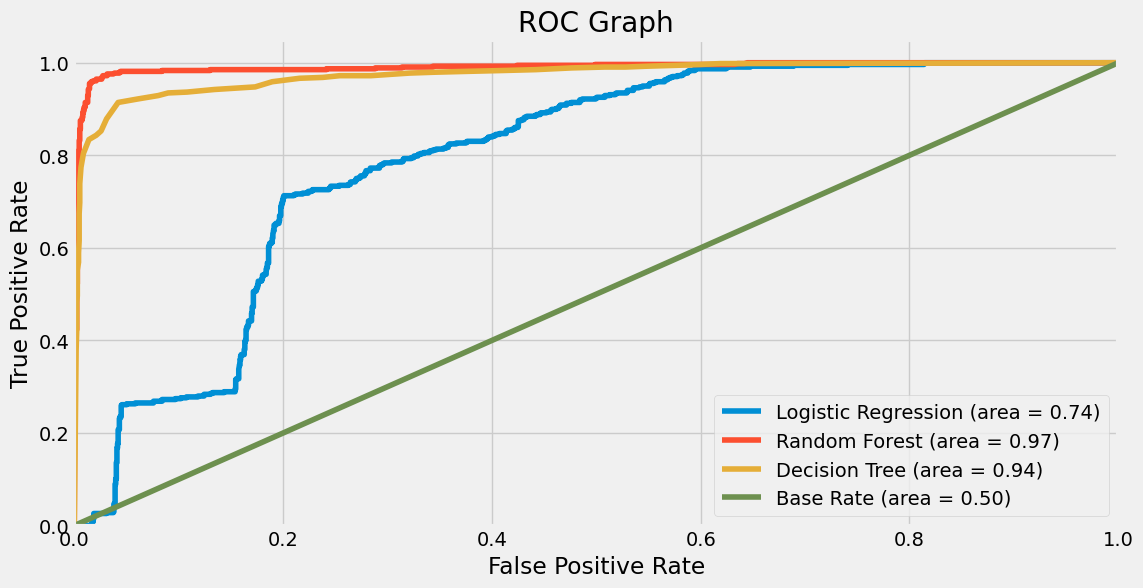

In [51]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)


# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate (area = %0.2f)' % base_roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [ ]:
The best model performance out of the four (Decision Tree Model, Logistic Regression Model & Random Forest Model) 
is Random Forest with a score of 0.97.
